In [69]:
# work in progress

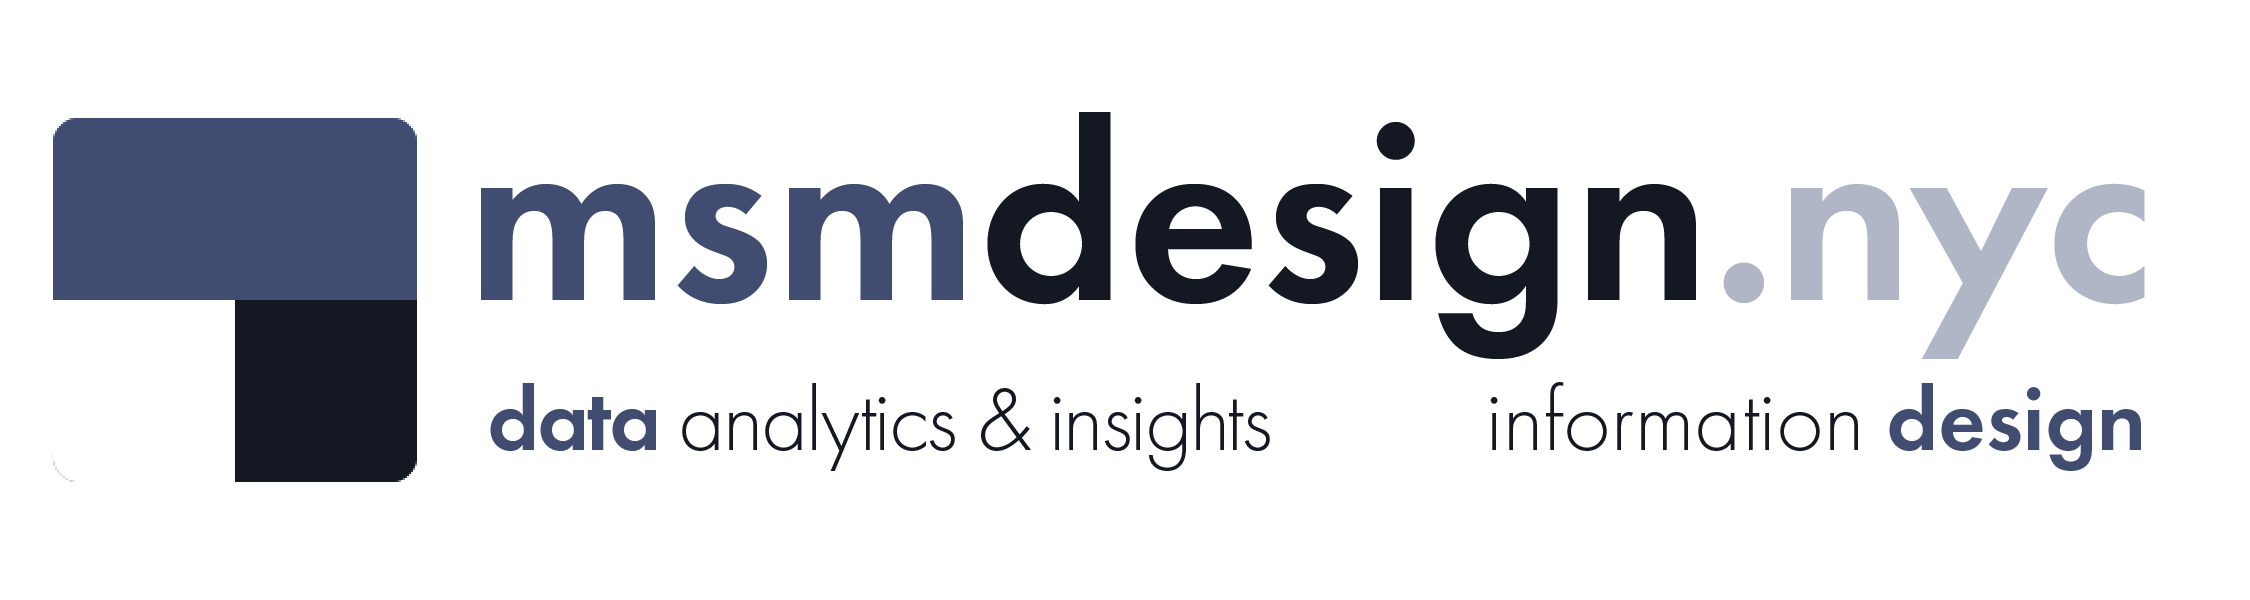

# Exploratory Data Analysis with Python Cookbook

**Compiled by David White <david@msmdesign.nyc>**

**Documentation:**  
- **[NumPy](https://numpy.org/doc/stable/ "NumPy Documentation")**  
- **[pandas](https://pandas.pydata.org/docs/ "pandas Documentation")**  
- **[Matplotlib](https://matplotlib.org/stable/api/index.html "Matplotlib Documentation")**  
- **[Seaborn](https://seaborn.pydata.org/api.html "Seaborn Documentation")**  

**Additional Resouces:**
- **[Python for Data Analysis, Wes McKinney](https://www.oreilly.com/library/view/python-for-data/9781449323592/)**
- **[Mastering Exploratory Analysis with pandas, Harish Garg](https://github.com/PacktPublishing/Mastering-Exploratory-Analysis-with-pandas)**
- **[How to Master Pandas for Data Science, Chanin Nantasenamat](https://towardsdatascience.com/how-to-master-pandas-for-data-science-b8ab0a9b1042)**
- **[Hands-On Data Analysis with Pandas, Stefanie Molin, Ken Jee](https://learning.oreilly.com/library/view/hands-on-data-analysis/9781800563452/)**

***

## 0. Setup the Workspace

### Import Numpy, pandas, Matplotlib, and Seaborn

In [1]:
# import the libraries typically used for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load CSV from GitHub

In [3]:
# load the data from the csv file (hosted on Github) and assign it to a variable

df = pd.read_csv('https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/titanic.csv', 
                   encoding='utf-8')

### Load CSV from Local Machine

In [3]:
# read from local csv file

# df_csv = pd.read_csv(r'C:\Users\david\Documents\titanic.csv', encoding='utf-8')

### Load Excel from Local Machine

In [4]:
# read from local Excel file

# df_xlsx = pd.read_excel(r'C:\Users\david\Documents\titanic.xlsx', sheet_name='titanic') # or sheet_name=0

# in both examples, note the "r" immediately before the file path. this prevents the unicode escape error

### Load Query Results from Google BigQuery

In [5]:
# conda install -c conda-forge pandas-gbq

# import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID. 
# project_id = "my-project"

# sql = """ 
# SELECT *
# FROM `bigquery-public-data.utility_us.country_code_iso`  
# """ 
# df_gbq = pandas_gbq.read_gbq(sql, project_id=project_id)

### Load JSON from NYC Open Data using  Socrata API

In [4]:
# import the library needed to load json data from the Socrata api

from sodapy import Socrata

In [5]:
# load the json data and store it in a variable

client = Socrata("data.cityofnewyork.us", None)

# First 2000 results, returned as JSON from API / converted to Python list of dictionaries by sodapy.

# on nyc open data page click on "API Docs", scroll to bottom of page, copy code snippet for "Python Pandas"

# the "9b9u-8989" key is unique to this particular data set

results = client.get("9b9u-8989", limit=2000)

# Convert to pandas DataFrame
df_socrata = pd.DataFrame.from_records(results)

***

## 1. Glimpse the Dataset's Contents

### Print the first (n) rows of the DataFrame

In [8]:
# confirm that the data has loaded correctly by displaying the first few rows of the DataFrame

# the default is 5 rows

df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Print the last (n) rows of the DataFrame

In [9]:
# confirm that the data has loaded correctly by displaying the last few rows of the DataFrame

# the default is 5 rows

df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


***

## 2. Determine the Size, Shape and Characteristics of the Dataset

### Find the Number of Rows and Columns in the DataFrame

In [21]:
# how many rows and how many columns are contained in our dataframe?

df.shape

(887, 8)

### Find the Index of the DataFrame

In [22]:
# what is the index (list of row labels) for our dataframe?

df.index

RangeIndex(start=0, stop=887, step=1)

### Display the DataFrame's Column Names

In [12]:
# what are the columns of our dataset?

df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

### Display the number of null values for each column

In [14]:
df_socrata.isnull().sum()

establishment_record_dba                          0
establishment_record_establishment_street         0
establishment_record_establishment_zip            0
establishment_record_establishment_borough        0
establishment_record_business_sector           1204
establishment_record_establishment_category    1088
establishment_record_actual_opening_date        182
number_of_employees                             209
establishment_record_type_of_cuisine           1275
dtype: int64

### Display a Description of Each Column

In [13]:
# what type of data is being stored in each column of our DataFrame?
# which columns (if any) are missing data?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


***

## 3. Change the Data Type of a Column

### Cast Series to Numeric Data Type

In [6]:
# let's adjust the data types of our columns so we can better analyze the data

df_socrata['number_of_employees'] = pd.to_numeric(df_socrata['number_of_employees'], errors='coerce')

### Cast Series to Categorical Data Type

In [8]:
df_socrata['establishment_record_establishment_category'] =\
df_socrata['establishment_record_establishment_category'].astype('category')

### Cast Series to Datetime Data Type

In [9]:
df_socrata['establishment_record_actual_opening_date'] = pd.to_datetime\
(df_socrata['establishment_record_actual_opening_date'], errors='coerce')

### Cast Series to Boolean Data Type

In [10]:
df['Survived'] = df['Survived'].astype('bool')

### Cast Series to String Data Type

In [11]:
df['Pclass'] = df['Pclass'].astype('string')

### Cast Series to Object Data Type

In [13]:
df['Pclass'] = df['Pclass'].astype('object')

***

## 4. Subset Data

### Select Data by Label

In [50]:
# .loc

# select the columns (all rows) we want to explore further and store them in a variable

df2 = df_socrata.loc[:,['establishment_record_dba','establishment_record_establishment_borough', 
                    'establishment_record_business_sector', 
                    'number_of_employees']]

In [51]:
df2.head(10)

,establishment_record_dba,establishment_record_establishment_borough,establishment_record_business_sector,number_of_employees
0,Orchard Grocer Inc,Manhattan,Accommodations and Food,NaN
1,Palermo Salumeria,Queens,NaN,NaN
2,Foragers City Grocers,Manhattan,NaN,NaN
3,Cultural Xchange,Brooklyn,NaN,3.0
4,ST. JOHNS CHURCH,Queens,NaN,NaN
5,Parm,Manhattan,NaN,NaN
6,Marmar Restaurant,Staten Island,Accommodations and Food,NaN
7,Celestiano,Brooklyn,NaN,6.0
8,Obao Cafe (Enfin Cafe),Manhattan,Other,NaN
9,Lucy's Lounge,Brooklyn,NaN,10.0


### Select Data by Index Location

In [44]:
# .iloc

df3 = df2.iloc[100:111,2:5]

In [45]:
df3

,establishment_record_business_sector,establishment_record_actual_opening_date,number_of_employees
100,NaN,NaT,75.0
101,NaN,NaT,5.0
102,NaN,NaT,2.0
103,NaN,NaT,20.0
104,NaN,NaT,2.0
105,NaN,NaT,2.0
106,NaN,NaT,40.0
107,NaN,NaT,4.0
108,NaN,NaT,10.0
109,NaN,NaT,15.0


### Select Data Based on a Single Condition

In [23]:
# example using a categorical variable

df_females = df.loc[df['Sex']=='female']

In [28]:
df_females.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,True,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,True,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,True,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,True,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,True,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
10,True,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
11,True,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500
14,False,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542
15,True,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000
18,False,3,Mrs. Julius (Emelia Maria Vandemoortele) Vande...,female,31.0,1,0,18.0000


In [31]:
# example using a numerical variable

df_minors = df.loc[df['Age']<=18]

In [32]:
df_minors.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
7,False,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
9,True,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
10,True,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
14,False,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542
16,False,3,Master. Eugene Rice,male,2.0,4,1,29.1250
22,True,3,Miss. Anna McGowan,female,15.0,0,0,8.0292
24,False,3,Miss. Torborg Danira Palsson,female,8.0,3,1,21.0750
32,True,3,Miss. Mary Agatha Glynn,female,18.0,0,0,7.7500
36,True,3,Mr. Hanna Mamee,male,18.0,0,0,7.2292
38,False,3,Miss. Augusta Maria Vander Planke,female,18.0,2,0,18.0000


### Select Data Based on Multiple Conditions

In [29]:
df_women_and_children = df.loc[(df['Sex']=='female') | (df['Age'] < 18)]

# --logical operators--
# and: &
# or: |
# equal to: ==
# not equal to: !=

In [30]:
df_women_and_children.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,True,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,True,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,True,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
7,False,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,True,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,True,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
10,True,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
11,True,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500
14,False,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542
15,True,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000


### Select Data Matching One of a Set of Values

In [52]:
# first, create a mask

bridge_and_tunnel = df_socrata['establishment_record_establishment_borough'].isin(['Brooklyn', 'Bronx',\
                                                                                   'Queens', 'Staten Island'])

# then apply the mask to the original DataFrame

df_socrata[bridge_and_tunnel].head(10)

,establishment_record_dba,establishment_record_establishment_street,establishment_record_establishment_zip,establishment_record_establishment_borough,establishment_record_business_sector,establishment_record_establishment_category,establishment_record_actual_opening_date,number_of_employees,establishment_record_type_of_cuisine
1,Palermo Salumeria,33-35 Francis Lewis Blvd,11358,Queens,NaN,NaN,NaT,NaN,NaN
3,Cultural Xchange,35 Lafayette Ave,11217,Brooklyn,NaN,NaN,NaT,3.0,NaN
4,ST. JOHNS CHURCH,90-37 213 Street,11428,Queens,NaN,NaN,NaT,NaN,NaN
6,Marmar Restaurant,370 Forest Ave.,10301,Staten Island,Accommodations and Food,Restaurants and Other Eating Places,2017-01-21,NaN,Mediterranean
7,Celestiano,562 Halsey Street,11233,Brooklyn,NaN,NaN,NaT,6.0,NaN
9,Lucy's Lounge,475 Third Ave,11215,Brooklyn,NaN,NaN,NaT,10.0,NaN
10,GRANDMA'S PIZZA,6918 3rd Avenue,11209,Brooklyn,NaN,NaN,NaT,15.0,NaN
11,KING GRILL,855 E 169 STREET,10459,Bronx,NaN,NaN,NaT,8.0,NaN
16,BANI RESTAURANT,1430 WATSON AVENUE,10472,Bronx,NaN,NaN,NaT,NaN,NaN
18,Subway - 2173A,2173A White Plains Road,10467,Bronx,NaN,NaN,NaT,NaN,NaN


### Select Data Matching a Substring

In [53]:
# first, cast the series as a string dtype if it is not aslready

df['Name'] = df['Name'].astype('string')

In [54]:
patricks = df['Name'].str.contains('Patrick')

In [55]:
df[patricks]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
115,False,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
507,True,3,Mr. Eugene Patrick Daly,male,29.0,0,0,7.7500
514,False,3,Mr. Patrick Ryan,male,30.0,0,0,24.1500
626,False,3,Mr. Patrick D O'Connell,male,18.0,0,0,7.7333
886,False,3,Mr. Patrick Dooley,male,32.0,0,0,7.7500


***

## 5. Sort Data

### Sort Data by a Single Column

In [ ]:
# placehlder

### Sort Data by Multiple Columns

In [56]:
multi_sort = df.sort_values(by=['Age','Fare','Pclass'], ascending=[False,False,True])

In [57]:
multi_sort.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
627,True,1,Mr. Algernon Henry Wilson Barkworth,male,80.0,0,0,30.0000
847,False,3,Mr. Johan Svensson,male,74.0,0,0,7.7750
490,False,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
95,False,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
115,False,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
741,False,1,Capt. Edward Gifford Crosby,male,70.0,1,1,71.0000
669,False,2,Mr. Henry Michael Mitchell,male,70.0,0,0,10.5000
535,False,3,Mr. Samuel Beard Risien,male,69.0,0,0,14.5000
33,False,2,Mr. Edward H Wheadon,male,66.0,0,0,10.5000
508,False,3,Mr. James Webber,male,66.0,0,0,8.0500


### Sort Data and Find the Top(n) Values

In [58]:
sorted_fares = df.sort_values(by='Fare', ascending=False)

In [59]:
sorted_fares.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
676,True,1,Mr. Thomas Drake Martinez Cardeza,male,36.0,0,1,512.3292
257,True,1,Miss. Anna Ward,female,35.0,0,0,512.3292
733,True,1,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292
87,True,1,Miss. Mabel Helen Fortune,female,23.0,3,2,263.0000
435,False,1,Mr. Mark Fortune,male,64.0,1,4,263.0000
339,True,1,Miss. Alice Elizabeth Fortune,female,24.0,3,2,263.0000
27,False,1,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000
738,True,1,Miss. Susan Parker Ryerson,female,21.0,2,2,262.3750
309,True,1,Miss. Emily Borie Ryerson,female,18.0,2,2,262.3750
117,False,1,Mr. Quigg Edmond Baxter,male,24.0,0,1,247.5208


### Sort Data and Find the Bottom(n) Values

In [60]:
sorted_ages = df.sort_values(by='Age',ascending=True)

In [61]:
sorted_ages.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
799,True,3,Master. Assad Alexander Thomas,male,0.42,0,1,8.5167
751,True,2,Master. Viljo Hamalainen,male,0.67,1,1,14.5000
641,True,3,Miss. Eugenie Baclini,female,0.75,2,1,19.2583
466,True,3,Miss. Helene Barbara Baclini,female,0.75,2,1,19.2583
827,True,2,Master. George Sibley Richards,male,0.83,1,1,18.7500
77,True,2,Master. Alden Gates Caldwell,male,0.83,0,2,29.0000
303,True,1,Master. Hudson Trevor Allison,male,0.92,1,2,151.5500
823,True,2,Master. Andre Mallet,male,1.00,0,2,37.0042
171,True,3,Miss. Eleanor Ileen Johnson,female,1.00,1,1,11.1333
379,True,3,Miss. Maria Nakid,female,1.00,0,2,15.7417


***

## 6. Calulate Descriptive Statistics 

### pandas Aggregate Functions

#### Absolute Value

In [ ]:
# abs()

#### Count

In [ ]:
# count()

# counts the number of non-null observations whereas size() will include NaN values

#### Cumulative Product

In [33]:
# cumprod()

#### Cumulative Sum

In [34]:
# cumsum()

#### Maximun Value

In [35]:
# max()

In [16]:
df_socrata['establishment_record_actual_opening_date'].max()

Timestamp('2018-09-14 00:00:00')

#### Mean Value

In [36]:
# mean()

In [37]:
df['Age'].mean()

29.471443066516347

#### Median of Values

In [ ]:
# median()

#### Minimum Value

In [ ]:
# min()

In [15]:
df_socrata['establishment_record_actual_opening_date'].min()

Timestamp('2005-01-01 00:00:00')

#### Mode of Values

In [ ]:
# mode()

#### Nth Value

In [38]:
# n()

#### Number of Distinct Elements

In [39]:
# nunique()

#### Product of Values

In [ ]:
# prod()

#### Standard Error of Mean Values

In [ ]:
# sem()

#### Size

In [ ]:
# size()

# computes the size of each group; count() will not include NaN values whereas size() will

#### Standard Deviation

In [ ]:
# std()

#### Sum

In [ ]:
# sum()

#### Variance

In [ ]:
# var()

### Aggregate a Single Series

In [ ]:
# placeholder

### Aggregate Multiple Series

In [ ]:
df_a[['Age', 'Fare']].median()

### Calculate Summary Statistics for All Numerical Variables

In [17]:
# display summary statistics for the numerical variables contained in our dataset

df.describe(include=[np.number])

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.00000
mean,29.471443,0.525366,0.383315,32.30542
std,14.121908,1.104669,0.807466,49.78204
min,0.420000,0.000000,0.000000,0.00000
25%,20.250000,0.000000,0.000000,7.92500
50%,28.000000,0.000000,0.000000,14.45420
75%,38.000000,1.000000,0.000000,31.13750
max,80.000000,8.000000,6.000000,512.32920


### Calculate Summary Statistics for All Categorical Variables

In [20]:
# calculate summary statistics for our dataset's categorical variables

df_socrata.describe(include=['category'])

,establishment_record_establishment_category
count,912
unique,16
top,Restaurants and Other Eating Places
freq,738


## 7. Group Data

### Calculate Summary Statistics on Subgroups

In [62]:
df.groupby(['Sex','Pclass']).describe()

Age                                                        \
               count       mean        std   min    25%   50%    75%   max   
Sex    Pclass                                                                
female 1        94.0  35.255319  13.257529  2.00  24.00  35.0  44.75  63.0   
       2        76.0  28.980263  12.855723  2.00  22.75  28.5  36.00  57.0   
       3       144.0  22.135417  12.181031  0.75  15.00  22.0  29.00  63.0   
male   1       122.0  41.511639  14.324665  0.92  31.00  41.5  50.00  80.0   
       2       108.0  30.493796  14.382035  0.67  23.00  30.0  37.00  70.0   
       3       343.0  26.470612  11.843691  0.42  20.00  25.0  32.00  74.0   

              Siblings/Spouses Aboard            ... Parents/Children Aboard  \
                                count      mean  ...                     75%   
Sex    Pclass                                    ...                           
female 1                         94.0  0.553191  ...                     1.0   
       2                         76.0  0.486842  ...                     1.0   
       3                        144.0  0.895833  ...                     1.0   
male   1                        122.0  0.311475  ...                     0.0   
       2                        108.0  0.342593  ...                     0.0   
       3                        343.0  0.504373  ...                     0.0   

                     Fare                                                      \
               max  count        mean        std      min       25%       50%   
Sex    Pclass                                                                   
female 1       2.0   94.0  106.125798  74.259988  25.9292  57.24480  82.66455   
       2       3.0   76.0   21.970121  10.891796  10.5000  13.00000  22.00000   
       3       6.0  144.0   16.118810  11.690314   6.7500   7.85420  12.47500   
male   1       4.0  122.0   67.226127  77.548021   0.0000  27.72810  41.26250   
       2       2.0  108.0   19.741782  14.922235   0.0000  12.33125  13.00000   
       3       5.0  343.0   12.695466  11.740102   0.0000   7.75000   7.92500   

                                     
                      75%       max  
Sex    Pclass                        
female 1       134.500000  512.3292  
       2        26.062500   65.0000  
       3        20.221875   69.5500  
male   1        78.459375  512.3292  
       2        26.000000   73.5000  
       3        10.008300   69.5500  

[6 rows x 32 columns]

### Calculate the Percent Compostition of a Group

In [63]:
df_socrata['establishment_record_establishment_borough'].value_counts(normalize=True)

Manhattan        0.4300
Brooklyn         0.3175
Queens           0.1640
Bronx            0.0575
Staten Island    0.0310
Name: establishment_record_establishment_borough, dtype: float64

### Group the Data into Buckets and Count the Number of Values in Each

In [68]:
df['Age'].value_counts(bins=4)

(20.315, 40.21]    487
(0.339, 20.315]    222
(40.21, 60.105]    152
(60.105, 80.0]      26
Name: Age, dtype: int64

### Groupby a Single Series and Apply a Single Aggregate Function

In [64]:
df.groupby('Pclass').mean()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,,,,,
1,0.629630,38.788981,0.416667,0.356481,84.154687
2,0.472826,29.868641,0.402174,0.380435,20.662183
3,0.244353,25.188747,0.620123,0.396304,13.707707


### Groupby Multiple Series and Apply a Single Aggregate Function

In [65]:
df.groupby(['Pclass','Sex']).mean()

Survived        Age  Siblings/Spouses Aboard  \
Pclass Sex                                                    
1      female  0.968085  35.255319                 0.553191   
       male    0.368852  41.511639                 0.311475   
2      female  0.921053  28.980263                 0.486842   
       male    0.157407  30.493796                 0.342593   
3      female  0.500000  22.135417                 0.895833   
       male    0.137026  26.470612                 0.504373   

               Parents/Children Aboard        Fare  
Pclass Sex                                          
1      female                 0.457447  106.125798  
       male                   0.278689   67.226127  
2      female                 0.605263   21.970121  
       male                   0.222222   19.741782  
3      female                 0.798611   16.118810  
       male                   0.227405   12.695466

### Groupby a Single Series and Apply Multiple Aggregate Functions

In [66]:
# aggregates with renaming

df.groupby('Pclass').agg(min_age = ('Age','min'), avg_age = ('Age', 'mean'), max_age = ('Age', 'max') )

,min_age,avg_age,max_age
Pclass,,,
1,0.92,38.788981,80.0
2,0.67,29.868641,70.0
3,0.42,25.188747,74.0


### Groupby Multiple Series and Apply Multiple Aggregate Functions

In [67]:
# aggregates with renaming

df.groupby(['Pclass','Sex']).agg(min_age = ('Age','min'), avg_age = ('Age', 'mean'), max_age = ('Age', 'max') )

min_age    avg_age  max_age
Pclass Sex                                
1      female     2.00  35.255319     63.0
       male       0.92  41.511639     80.0
2      female     2.00  28.980263     57.0
       male       0.67  30.493796     70.0
3      female     0.75  22.135417     63.0
       male       0.42  26.470612     74.0

***

## 8. Plot Data Using pandas

### Area Plot

In [ ]:
# area plot

### Bar Plot - Horizonal

In [ ]:
# bar plot - horizontal

### Bar Plot - Vertical

In [21]:
# bar plot - vertical

### Boxplot

<AxesSubplot:>

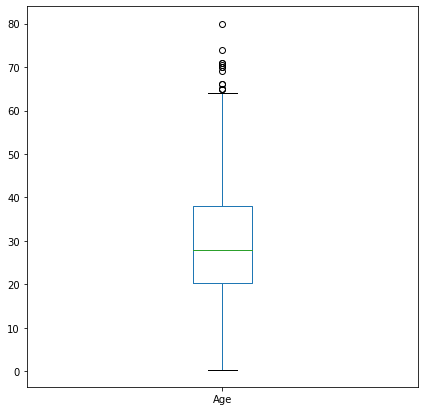

In [70]:
df['Age'].plot(kind='box',figsize=(7,7))

### Hexbin

In [ ]:
# hexbin plot

### Histogram

<AxesSubplot:ylabel='Frequency'>

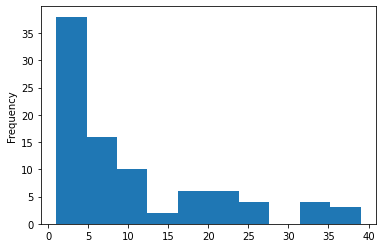

In [71]:
df['Age'].value_counts().plot(kind='hist')

### Kernal Density Estimation Plot

In [ ]:
# kernal density estimation plot

### Line Graph

In [ ]:
df_a.plot(kind='line',x='Age', y='Fare',figsize=(10,5))

### Pie Plot

In [ ]:
# pie plot

### Scatter Plot

<AxesSubplot:xlabel='Age', ylabel='Fare'>

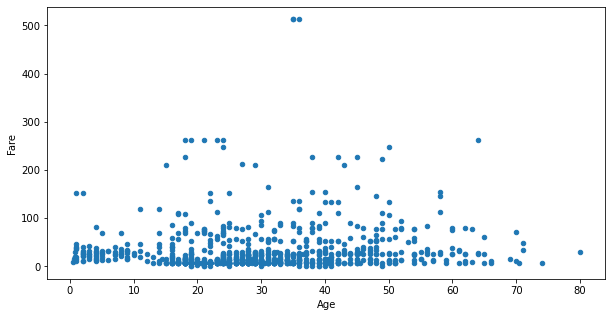

In [72]:
df.plot(kind='scatter',x='Age', y='Fare',figsize=(10,5))

### Plot Data Using Aggregate Funtcions

<AxesSubplot:>

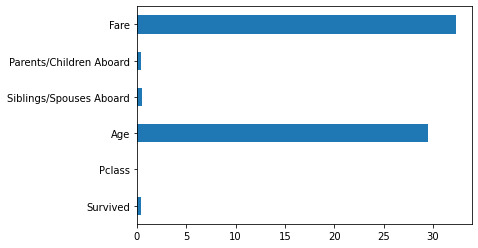

In [74]:
df.mean().plot(kind='barh')

### Plot Data Using Value Counts

<AxesSubplot:>

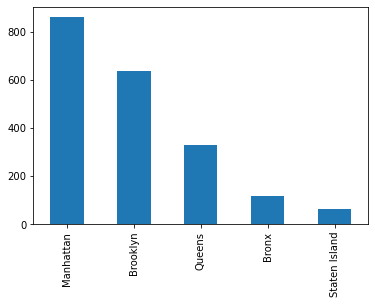

In [73]:
# create a bar graph that shows how many of the businesses are located in each nyc borough

df_socrata['establishment_record_establishment_borough'].value_counts().plot(kind='bar')

***

***